# 📘 Machine Learning com o Dataset Iris

Este notebook reúne diferentes experimentos usando o famoso dataset **Iris**.
Ele cobre desde a normalização, até o treino de modelos como **Regressão Logística** e **Árvore de Decisão**, além de uma comparação entre diferentes *solvers* da regressão logística.

## 1. Importação de Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

## 2. Carregando e Explorando o Dataset

In [2]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target # Adiciona uma nova coluna chamada target ao DataFrame.
# Essa coluna contém os rótulos (classes) de cada flor,
# representados como 0, 1 ou 2 (que correspondem às espécies: setosa, versicolor e virginica).

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 3. Normalização dos Dados

A normalização é o processo de **padronizar os valores das features** para que fiquem em uma escala comparável.  
No caso do `StandardScaler`, cada coluna é transformada em **Z-score**, ou seja:  
- Média = 0  
- Desvio padrão = 1  

Isso é importante para algoritmos que dependem da distância entre valores (como Regressão Logística, KNN, SVM), evitando que features com valores maiores dominem o aprendizado.


In [3]:
scaler = StandardScaler() # Cria um objeto StandardScaler do scikit-learn.
# Esse scaler padroniza os dados, ou seja, transforma cada feature para ter média 0 e desvio padrão 1 (Z-score).

X_scaled = scaler.fit_transform(df[iris.feature_names]) # Aplica o StandardScaler às colunas numéricas do DataFrame (apenas as features, sem a coluna target).
# fit_transform faz duas coisas:
    # fit → calcula média e desvio padrão de cada coluna.
    # transform → aplica a padronização usando os valores calculados.
# O resultado é um numpy array com os dados normalizados.

df_scaled = pd.DataFrame(X_scaled, columns=iris.feature_names)
# Converte o array normalizado de volta para um DataFrame do pandas para facilitar visualização e manipulação.
# Mantemos os mesmos nomes de colunas do dataset original.

print("=== Antes da normalização ===")
display(df.head())
print("\n=== Depois da normalização (Z-score) ===")
display(df_scaled.head())

=== Antes da normalização ===


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0



=== Depois da normalização (Z-score) ===


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## 4. Divisão em Treino e Teste

Antes de treinar um modelo, os dados são divididos em **conjunto de treino** e **conjunto de teste**.  

- **Treino**: usado para o modelo aprender padrões.  
- **Teste**: usado para avaliar o desempenho em dados não vistos.  

No exemplo, 70% dos dados vão para treino e 30% para teste, garantindo que o modelo seja avaliado de forma justa.  
O parâmetro `random_state` assegura que a divisão seja **reproduzível**.


In [4]:
# Definindo as features (X) e o target (y)
X = df_scaled          # Features normalizadas
y = df['target']       # Coluna alvo (classes de Iris)

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,    # 30% dos dados vão para teste
    random_state=42   # Garante reprodutibilidade da divisão
)


## 5. Modelo 1 — Regressão Logística

A Regressão Logística é um modelo de classificação usado para prever categorias discretas (aqui: as espécies de íris).


In [5]:
# Cria o modelo de Regressão Logística
# max_iter=200 garante que o algoritmo converja, random_state=42 garante resultados reproduzíveis
log_reg = LogisticRegression(max_iter=200, random_state=42)

# Treina o modelo usando os dados de treino
log_reg.fit(X_train, y_train)

# Faz previsões no conjunto de teste
y_pred_log = log_reg.predict(X_test)

# Imprime a acurácia e o relatório detalhado
print("\n🔹 Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log, target_names=iris.target_names))

# Mostra os coeficientes por classe
# Indica a importância de cada feature na previsão das classes
coef_df = pd.DataFrame(log_reg.coef_, columns=iris.feature_names)
coef_df["classe"] = iris.target_names
coef_df


🔹 Regressão Logística
Acurácia: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classe
0,-0.980389,1.051428,-1.747783,-1.604326,setosa
1,0.488076,-0.363353,-0.299712,-0.676174,versicolor
2,0.492313,-0.688074,2.047495,2.280500,virginica


## 6. Modelo 2 — Árvore de Decisão

A Árvore de Decisão é um modelo de classificação que cria regras de decisão em formato de árvore, dividindo os dados em nós com base nas features para prever as classes.



🔹 Árvore de Decisão
Acurácia: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



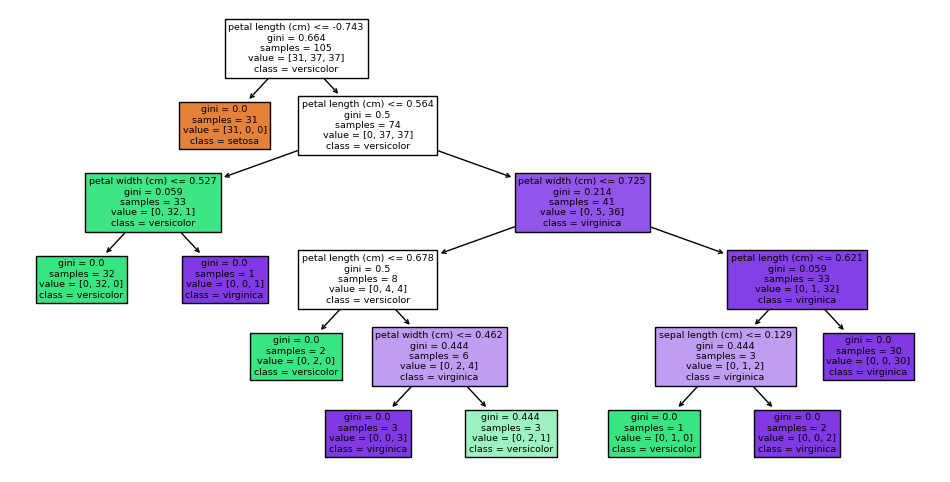

In [6]:
# Cria o modelo de Árvore de Decisão
# max_depth=5 limita a profundidade da árvore para evitar overfitting
# random_state=42 garante resultados reproduzíveis
tree = DecisionTreeClassifier(max_depth=5, random_state=42)

# Treina o modelo usando os dados de treino
tree.fit(X_train, y_train)

# Faz previsões no conjunto de teste
y_pred_tree = tree.predict(X_test)

# Imprime a acurácia e o relatório detalhado
print("\n🔹 Árvore de Decisão")
print("Acurácia:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree, target_names=iris.target_names))

# Visualiza a árvore de decisão
plt.figure(figsize=(12,6))
plot_tree(tree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)# # filled=True colore os nós com base nas classes
plt.show()

## 7. Testando diferentes solvers da Regressão Logística

Neste bloco exploramos como diferente` *solve`s*, penalidade`(*penal`*) e valores de regularizaçã`(`*) afetam o treinamento da Regressão Logística. Isso ajuda a entender comportamento do modelo e tempos de treino.


In [7]:
# Função para testar diferentes solvers e configurações
def testar_solver(solver, penalty="l2", C=1.0, max_iter=200):
    # Mostra a configuração atual
    print(f"\n🔹 Solver: {solver}, Penalty: {penalty}, C={C}")
    
    # Marca o início do treino
    inicio = time.time()
    
    # Cria o modelo de Regressão Logística com parâmetros especificados
    model = LogisticRegression(
        solver=solver,       # Algoritmo de otimização
        penalty=penalty,     # Tipo de regularização (L1 ou L2)
        C=C,                 # Força da regularização (menor valor = regularização mais forte)
        max_iter=max_iter,   # Máximo de iterações
        multi_class="auto"   # Ajusta automaticamente para multi-classes
    )
    
    # Treina o modelo
    model.fit(X_train, y_train)
    
    # Marca o fim do treino
    fim = time.time()
    
    # Faz predições no conjunto de teste
    y_pred = model.predict(X_test)
    
    # Mostra métricas e tempo
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("Tempo de treino:", round(fim - inicio, 4), "s")
    
    # Mostra os primeiros 5 coeficientes da primeira classe
    print("Coeficientes (1ª classe):", model.coef_[0][:5])



In [8]:
# Casos de teste:

# 1️⃣ liblinear + L2
testar_solver("liblinear", penalty="l2")
# ✅ Recomendado para problemas binários ou datasets pequenos.
# Exemplo: prever churn (sim/não) em uma pequena base de clientes.
# ⚠️ Pode não ser ótimo para multiclasses ou grandes datasets.

# 2️⃣ lbfgs + L2
testar_solver("lbfgs", penalty="l2")
# ✅ Ideal para problemas multiclasses e datasets médios/grandes.
# Exemplo: classificação de espécies de flores (Iris) ou categorias de produtos.
# ⚠️ Requer dados escalonados para melhor convergência.

# 3️⃣ saga + L1 (gera sparsidade nos coeficientes)
testar_solver("saga", penalty="l1")
# ✅ Útil para datasets com muitas features, pois L1 promove sparsidade.
# Exemplo: dados de textos vetorizados ou engenharia de features extensa.
# ⚠️ Mais lento que lbfgs, mas ajuda na seleção automática de features.

# 4️⃣ saga + L2 + regularização forte (C baixo)
testar_solver("saga", penalty="l2", C=0.1)
# ✅ Regularização forte para prevenir overfitting.
# Exemplo: prever risco de crédito em uma base com muitas amostras e outliers.
# ⚠️ Pode reduzir performance se exagerada; ajustar C conforme necessidade.

# 5️⃣ lbfgs + poucas iterações (não converge)
testar_solver("lbfgs", penalty="l2", max_iter=5)
#⚠️ Exemplo de não convergência: o modelo não consegue aprender corretamente.
# ✅ Sempre aumentar max_iter ou escalonar os dados.


🔹 Solver: liblinear, Penalty: l2, C=1.0
Acurácia: 0.8888888888888888
Tempo de treino: 0.0106 s
Coeficientes (1ª classe): [-0.7129248   1.3602688  -1.57816263 -1.37370594]

🔹 Solver: lbfgs, Penalty: l2, C=1.0
Acurácia: 1.0
Tempo de treino: 0.0313 s
Coeficientes (1ª classe): [-0.98038903  1.0514275  -1.74778303 -1.60432635]

🔹 Solver: saga, Penalty: l1, C=1.0
Acurácia: 1.0
Tempo de treino: 0.0303 s
Coeficientes (1ª classe): [ 0.          0.8287737  -3.74760899 -0.6819499 ]

🔹 Solver: saga, Penalty: l2, C=0.1
Acurácia: 0.8888888888888888
Tempo de treino: 0.0061 s
Coeficientes (1ª classe): [-0.46808367  0.4616494  -0.69986274 -0.64659229]

🔹 Solver: lbfgs, Penalty: l2, C=1.0
Acurácia: 0.9777777777777777
Tempo de treino: 0.0106 s
Coeficientes (1ª classe): [-0.88820086  0.94612593 -1.50009988 -1.35509531]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 8. Conclusão
- A **Regressão Logística** foi eficiente para o problema multiclasse.
- A **Árvore de Decisão** trouxe interpretabilidade visual.
- Diferentes **solvers** podem impactar tempo de treino, regularização e coeficientes.